# Data Setup

In [6]:
!pip install osmnx

import osmnx as ox
import pandas as pd

from shapely.geometry import box

import matplotlib.pyplot as plt

# OSM Extract

In [5]:
# Define bounding box coordinates
north = 41.9910
south = 41.7790
east = -87.5800
west = -87.7268

# Create a bounding box polygon
bbox = box(west, south, east, north)

# Define tags to pull
tags = {
    'amenity': ['bar', 'pub', 'restaurant'],
    'craft': ['brewery'],
    'leisure': ['nightclub']
}

# Pull features inside the polygon
gdf = ox.features_from_polygon(bbox, tags)

# If geometries are areas (polygons), take their centroids
gdf['geometry'] = gdf['geometry'].centroid

# Build clean DataFrame
bars_df = pd.DataFrame({
    'Name': gdf.get('name'),
    'Latitude': gdf.geometry.y,
    'Longitude': gdf.geometry.x,
    'Amenity': gdf.get('amenity'),
    'Craft': gdf.get('craft'),
    'Leisure': gdf.get('leisure')
})

# Drop missing names if you want
bars_df = bars_df.dropna(subset=['Name'])

# Preview
print(bars_df.head())
print(f"\nTotal venues pulled from OSM: {len(bars_df)}")

# Save
bars_df.to_csv('osm_chicago_bars_full.csv', index=False)

                                        Name   Latitude  Longitude  \
element id                                                           
node    306741002  Bubba Gump Shrimp Company  41.891411 -87.609658   
        318274065     Pizano's Pizza & Pasta  41.881975 -87.625669   
        346210195     Lou Malnati's Pizzeria  41.929150 -87.653565   
        346235240                 La Amistad  41.961634 -87.676649   
        347158474      Midtown Kitchen & Bar  41.885877 -87.631708   

                      Amenity Craft Leisure  
element id                                   
node    306741002  restaurant   NaN     NaN  
        318274065  restaurant   NaN     NaN  
        346210195  restaurant   NaN     NaN  
        346235240  restaurant   NaN     NaN  
        347158474         pub   NaN     NaN  

Total venues pulled from OSM: 2700


<ipython-input-5-a66b39fb4b75>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['geometry'] = gdf['geometry'].centroid


# Visualization

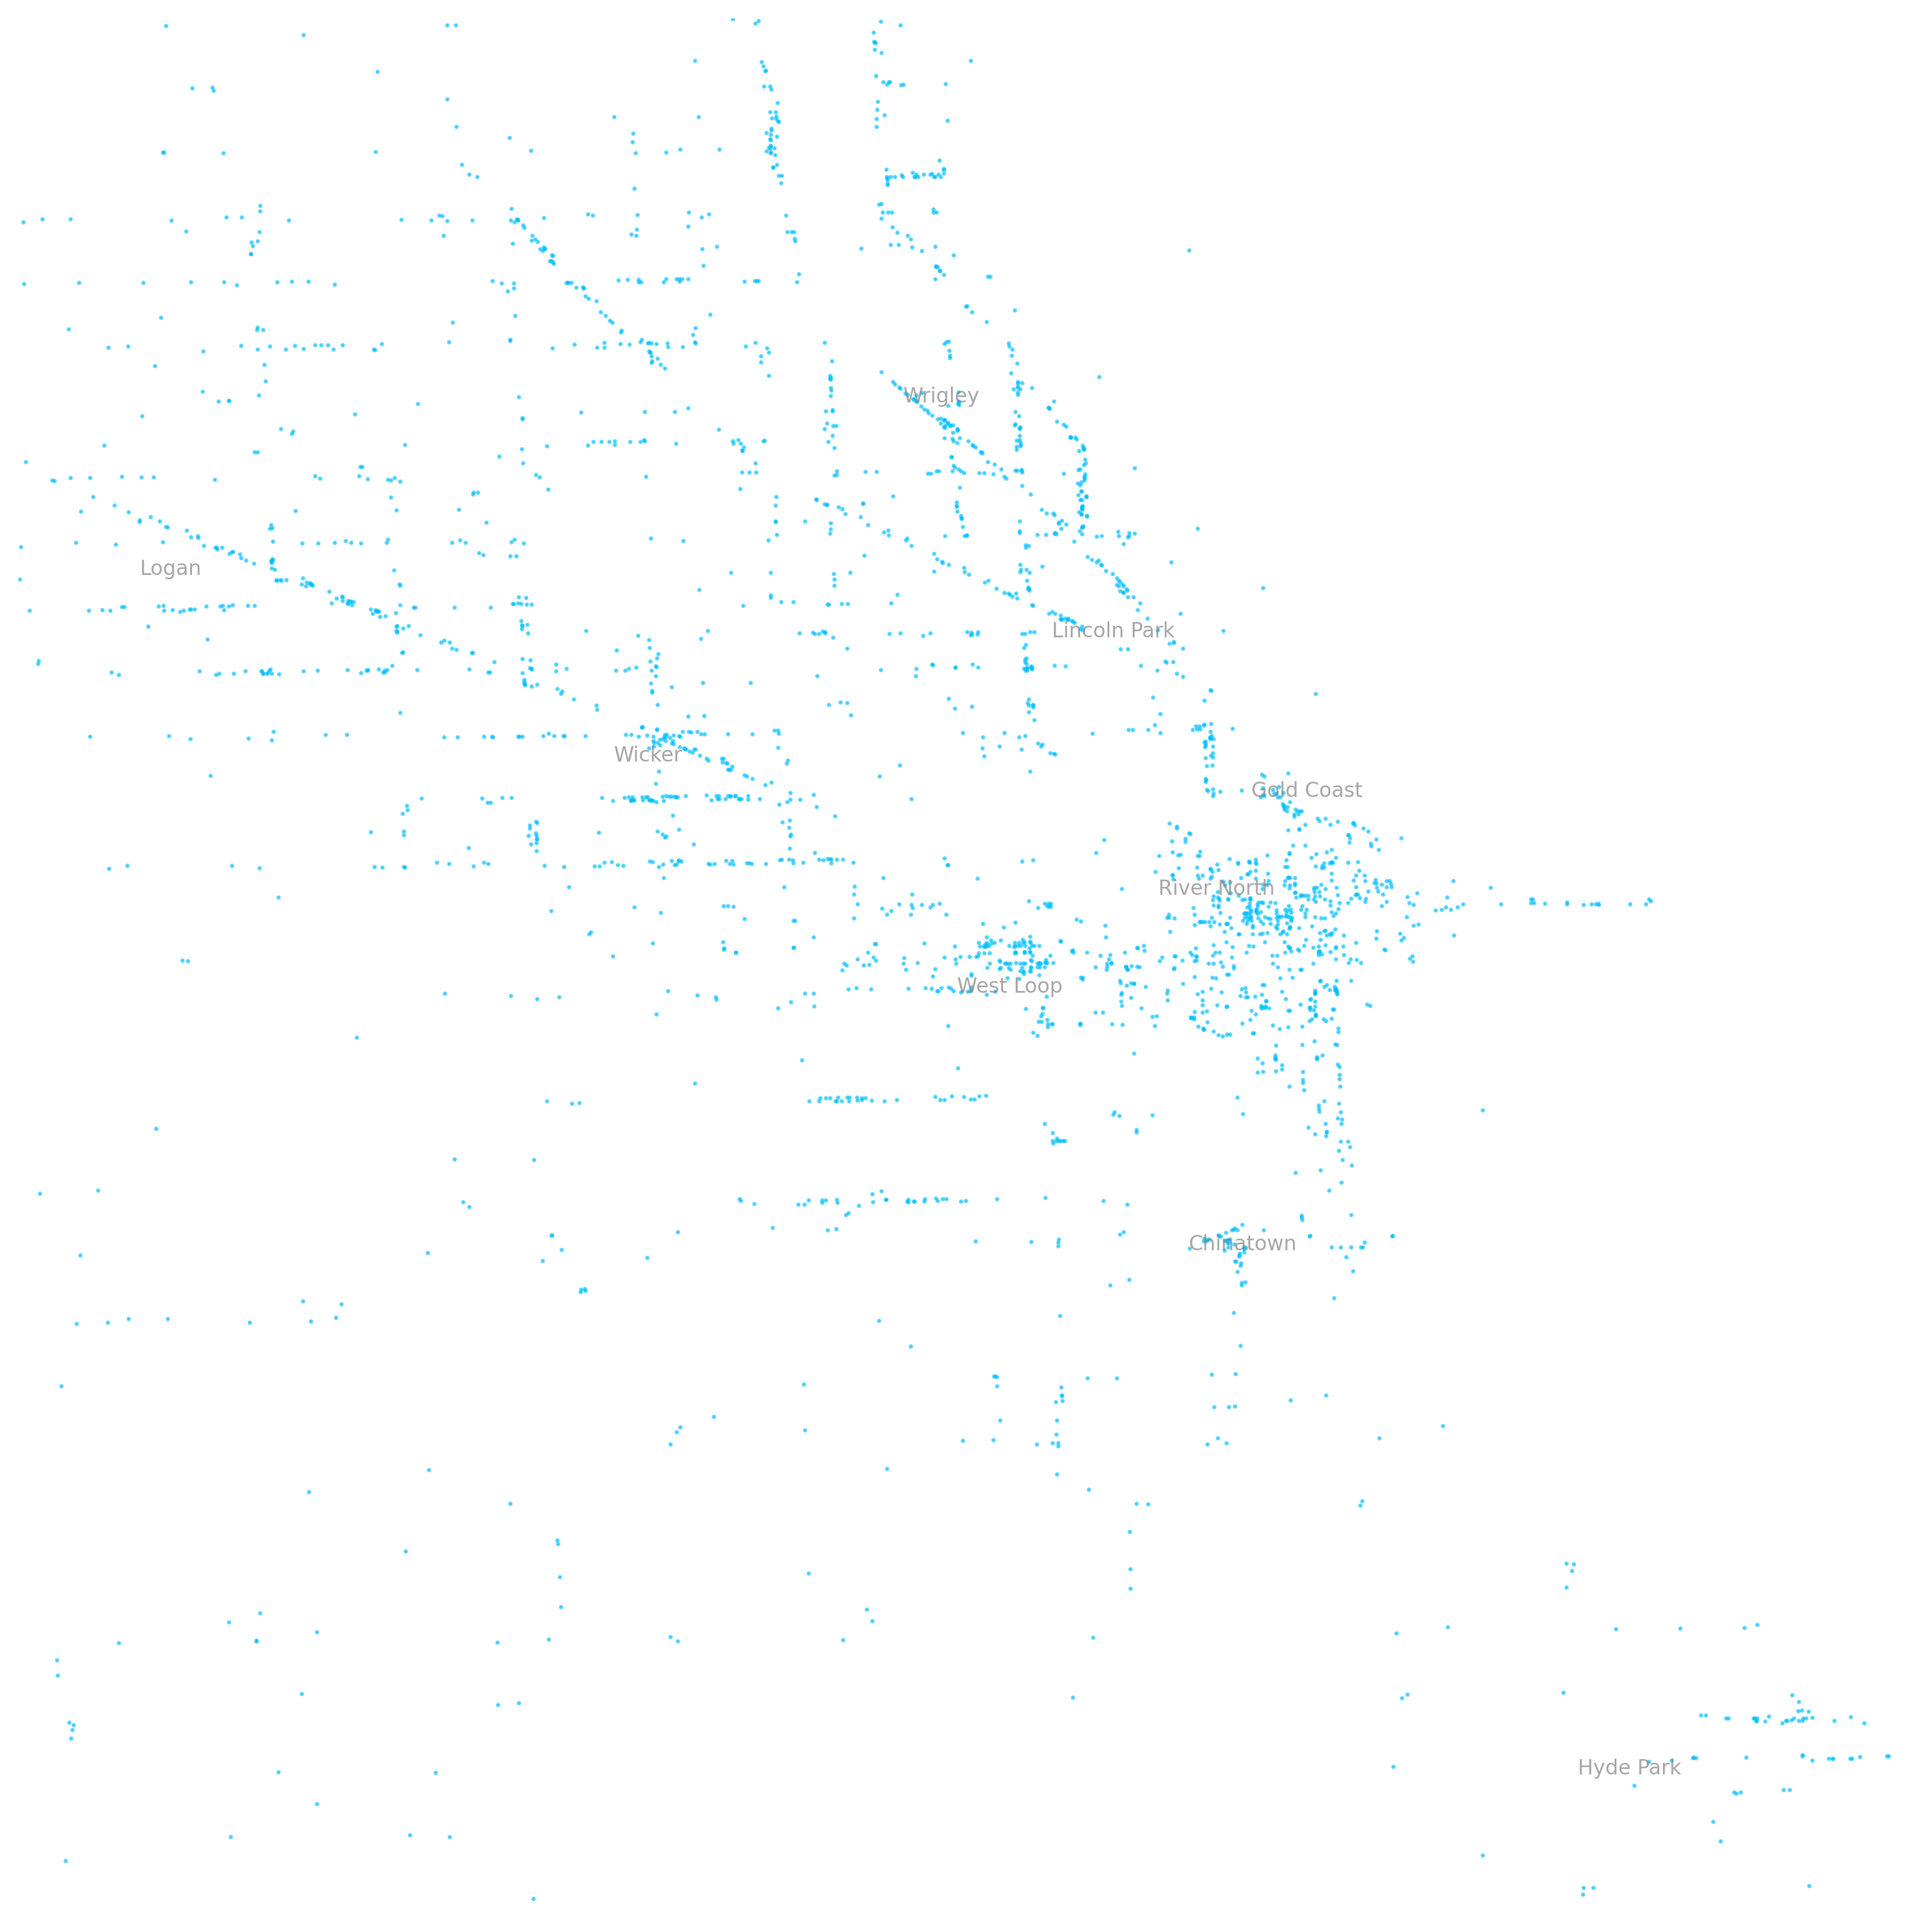

In [10]:
# If needed, reload your bars_df
# bars_df = pd.read_csv('osm_chicago_bars_full.csv')

# Set up figure
fig, ax = plt.subplots(figsize=(13.33, 13.33), dpi=300)

# Plot tiny blue dots
ax.scatter(
    bars_df['Longitude'],
    bars_df['Latitude'],
    s=0.5,
    color='deepskyblue',
    alpha=0.6
)

# Set bounding box
north = 41.9910
south = 41.7790
east = -87.5800
west = -87.7268
ax.set_xlim(west, east)
ax.set_ylim(south, north)

# Remove axes
ax.set_axis_off()
fig.patch.set_facecolor('white')

# --- Add Neighborhood + Wrigley Field Labels ---

# Updated list
neighborhood_labels = {
    'Wicker': (-87.678, 41.908),
    'River North': (-87.634, 41.893),
    'Gold Coast': (-87.627, 41.904),
    'West Loop': (-87.650, 41.882),
    'Lincoln Park': (-87.642, 41.922),
    'Logan': (-87.715, 41.929),
    'Hyde Park': (-87.602, 41.794),
    'Chinatown': (-87.632, 41.853),
    'Wrigley': (-87.6553, 41.9484)
}

# Add labels
for name, (lon, lat) in neighborhood_labels.items():
    ax.text(
        lon, lat, name,
        fontsize=8,
        color='gray',
        alpha=0.7,
        ha='center',
        va='center'
    )

# Save high-res
plt.savefig('chicago_bars_labeled_final_wrigley.png', dpi=600, bbox_inches='tight', pad_inches=0)

# Show
plt.show()

